In [ ]:
#5.2 example: Convnet from scratch on a small dataset
#Small dataset can be a few 100 to a few 1000 images
#This however will get you ~70% accuracy - mainly because of over-fitting
#Data augmentation brings it up to 81%
#Two more essential techniques for small sets:
#1)feature extraction with a pre-trained network (will get you 90% to 96% accuracy)
#2) fine-tuning a pre-trained network (97%)

In [34]:
import sys;print('python version:',sys.version) 
import tensorflow as tf;print('tf_version:',tf.__version__) #tf: 2.1 
from tensorflow import keras; print('keras version:',keras.__version__) 
from tensorflow.python.platform import build_info as tf_build_info 
print('CUDA Version:',tf_build_info.cuda_version_number) 
print('CUDNN Version:',tf_build_info.cudnn_version_number)
import keras 
print("keras version on its own:",keras.__version__) #tf keras and keras library can have different versions

python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
tf_version: 2.1.0
keras version: 2.2.4-tf
CUDA Version: 10.1
CUDNN Version: 7.6
keras version on its own: 2.3.1


In [14]:
# The path to the directory where the original
# dataset was uncompressed
#Comment out os.mkdir(X) after the 1st run or add an if condition like if os.exist -something like that 

original_dataset_dir = 'C:\\Users\\osama\\Downloads\\dogs-vs-cats\\train\\train'

# The directory where we will
# store our smaller dataset
base_dir = 'C:\\Users\\osama\\Downloads\cats_and_dogs_small'
#os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)


# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [15]:
#Sanity Check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [17]:
#Model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) #input shape is arbitray choice. The actual cat/dog images are greather than this size
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #one more convnet and max pooling layer from 5.1 example. This augments the network and resuces the size of the feature map so they are not too large when they reach the flatten layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) #network of 512 dense layers
model.add(layers.Dense(1, activation='sigmoid')) #either cat or dog
model.summary() #depth of the feature map is increasing from 32 to 128 but the size is decreasing from 148*148 to 7*7

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [31]:
#model compile: setting the loss function; optimizer
from keras import optimizers
#Making network/model ready for training
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc']) #Metrics to monitor during training and testing—Here, we’ll only care about accuracy(the fraction of the images that were correctly classified).


In [24]:
#Data pre-processing. Requires following:
#jpg>RGB channels>floating point tensors> normalize or rescale the pixel values from 0-255 to [0,1]
#Keras' IamgeDataGenerator class takes care of that
#by this step, should give you the input image as a tensor and associated labels for training

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the target directory
        target_size=(150, 150),# All images will be resized to 150x150
        batch_size=20,
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

#check output of the tensors
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape) #output is x samples of 150x150*RGB. where x is the batch size
    print('labels batch shape:', labels_batch.shape) #binary labels. shape same as batch size
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [30]:
#fitting the data (answers, input images) into the model/network is the same as training it
history = model.fit_generator( #model.fit - we name it history? interesting
      train_generator, #aboove train generator
      steps_per_epoch=100, #samples per epoch. total train_images/batch_size. Our case 2000/20=100; 2000 is cat+dog; takes these many gradien steps before going to the next epoch
      epochs=30,
      validation_data=validation_generator, #can be tuple or a data generator; but if latter then you should specify val_steps that tell the process how many batches to draw from the validation generator; otherwise, goes on forever
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 35s 350ms/step - loss: 0.6878 - acc: 0.5510 - val_loss: 0.6567 - val_acc: 0.5930
Epoch 2/30
100/100 [==============================] - 32s 320ms/step - loss: 0.6502 - acc: 0.6145 - val_loss: 0.6209 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 34s 345ms/step - loss: 0.5978 - acc: 0.6760 - val_loss: 0.5164 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 37s 368ms/step - loss: 0.5566 - acc: 0.7160 - val_loss: 0.4558 - val_acc: 0.6430
Epoch 5/30
100/100 [==============================] - 36s 364ms/step - loss: 0.5260 - acc: 0.7285 - val_loss: 0.4921 - val_acc: 0.5670
Epoch 6/30
100/100 [==============================] - 36s 365ms/step - loss: 0.5150 - acc: 0.7415 - val_loss: 0.8693 - val_acc: 0.6820
Epoch 7/30
100/100 [==============================] - 37s 368ms/step - loss: 0.4889 - acc: 0.7600 - val_loss: 0.5736 - val_acc: 0.6840
Epoch 8/30
100/100 [==============================] - 3

In [32]:
#Save ya model - good practice
model.save('cats_and_dogs_small_1.h5')

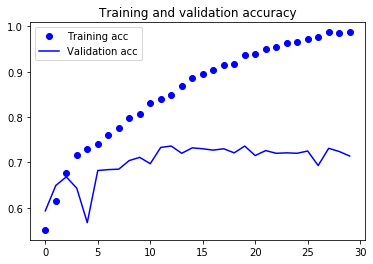

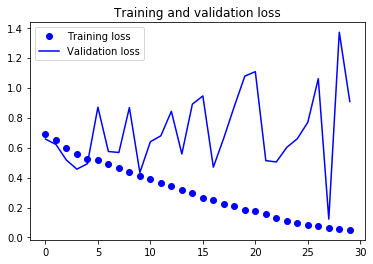

In [33]:
#plot the loss and accuracy of the model over the training and validation data during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()